<a href="https://colab.research.google.com/github/Rito43/Rito43/blob/main/M23CSA021_CV_edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


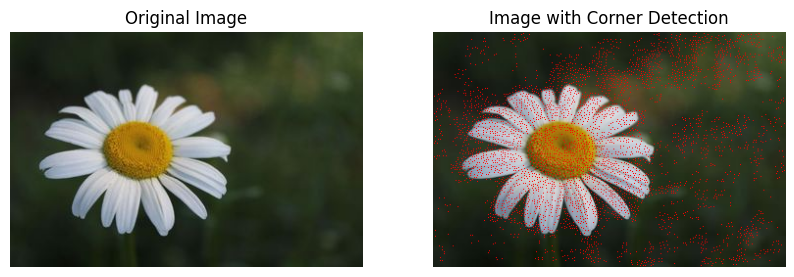

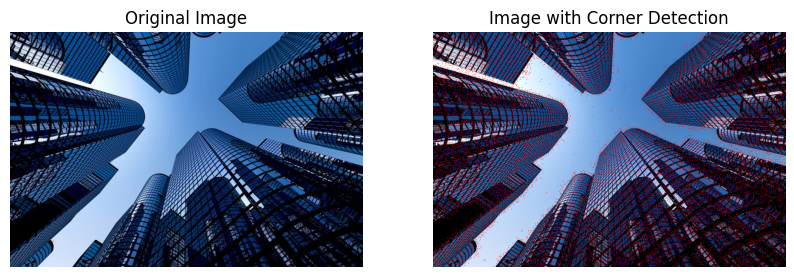

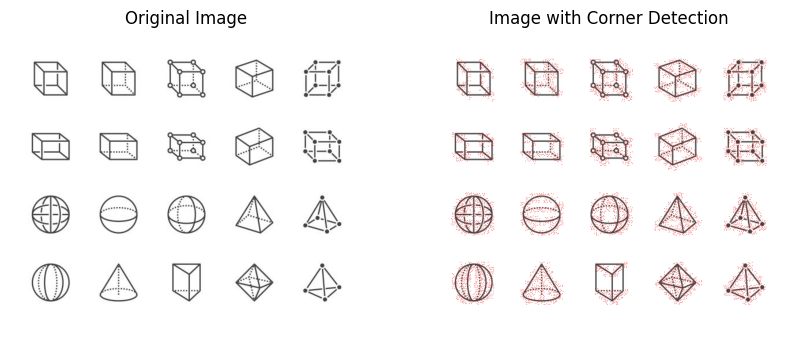

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def custom_harris_corner_detection(image, window_size=3, k=0.04, threshold=0.01):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Sobel operator for gradient calculation
    dx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

    dy = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

    Ix = cv2.filter2D(gray, -1, dx)
    Iy = cv2.filter2D(gray, -1, dy)

    # Calculate elements of the Harris matrix
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix * Iy

    height, width = gray.shape

    # Compute the sum of squares of gradients in the window
    Sxx = cv2.boxFilter(Ixx, -1, (window_size, window_size))
    Syy = cv2.boxFilter(Iyy, -1, (window_size, window_size))
    Sxy = cv2.boxFilter(Ixy, -1, (window_size, window_size))

    # Calculate the determinant and trace of the Harris matrix
    det_H = (Sxx * Syy) - (Sxy**2)
    trace_H = Sxx + Syy

    # Harris response
    R = det_H - k * (trace_H**2)

    # Non-maximum suppression
    R_max = np.max(R)
    R_threshold = threshold * R_max
    corner_mask = np.zeros_like(R, dtype=np.uint8)
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if R[y, x] > R_threshold and R[y, x] > R[y-1, x-1] and R[y, x] > R[y-1, x] and R[y, x] > R[y-1, x+1] and R[y, x] > R[y, x-1] and R[y, x] > R[y, x+1] and R[y, x] > R[y+1, x-1] and R[y, x] > R[y+1, x] and R[y, x] > R[y+1, x+1]:
                corner_mask[y, x] = 255

    # Overlay corners on original image
    result_image = image.copy()
    result_image[corner_mask == 255] = [0, 0, 255]  # Red color for corner points

    return result_image


def detect_corners_in_folder(folder_path):
    # Images to be compared
    images_to_compare = ['8.jpg', '10.jpg', '5.jpg']

    for filename in os.listdir(folder_path):
        if filename in images_to_compare:
            file_path = os.path.join(folder_path, filename)
            image = cv2.imread(file_path)

            # Apply custom Harris Corner Detection
            modified_image = custom_harris_corner_detection(image)

            # Display original and modified images side by side
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            axes[0].set_title('Original Image')
            axes[0].axis('off')

            axes[1].imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
            axes[1].set_title('Image with Corner Detection')
            axes[1].axis('off')

            plt.show()

# Specify folder path
folder_path = '/content/drive/MyDrive/Question1'

# Detect corners in specified images in the folder
detect_corners_in_folder(folder_path)


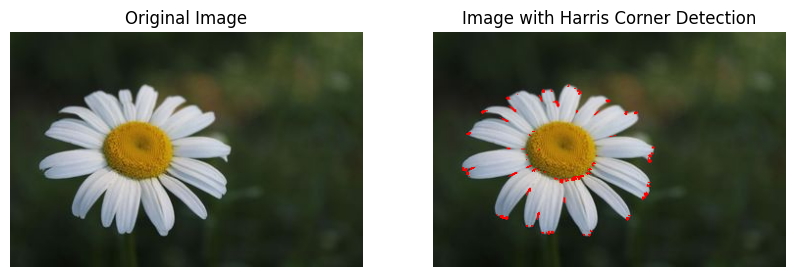

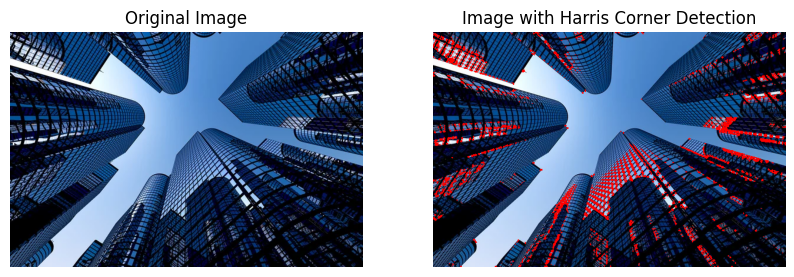

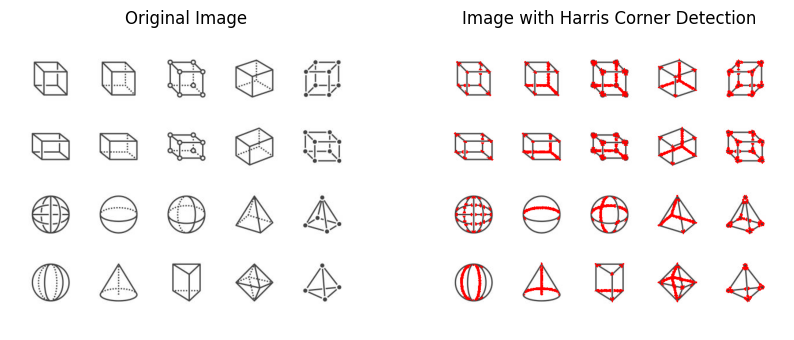

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from google.colab import drive


def harris_corner_detection(image, window_size=3, k=0.04, threshold=0.01):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Harris corner detection
    corners = cv2.cornerHarris(gray, window_size, 3, k)

    # Thresholding
    corners = cv2.threshold(corners, threshold * corners.max(), 255, cv2.THRESH_BINARY)[1]

    # Overlay corners on original image
    result_image = image.copy()
    result_image[corners > 0] = [0, 0, 255]  # Red color for corner points

    return result_image

def detect_corners_in_folder(folder_path):
    # Images to be compared
    images_to_compare = ['8.jpg', '10.jpg', '5.jpg']

    for filename in os.listdir(folder_path):
        if filename in images_to_compare:
            file_path = os.path.join(folder_path, filename)
            image = cv2.imread(file_path)

            # Apply Harris Corner Detection
            modified_image = harris_corner_detection(image)

            # Display original and modified images side by side
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            axes[0].set_title('Original Image')
            axes[0].axis('off')

            axes[1].imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
            axes[1].set_title('Image with Harris Corner Detection')
            axes[1].axis('off')

            plt.show()

# Specify folder path
folder_path = '/content/drive/MyDrive/Question1'

# Detect corners in specified images in the folder
detect_corners_in_folder(folder_path)


In [ ]:
pip install opencv-python

In [ ]:
import cv2
import numpy as np

# Load stereo images
img_left = cv2.imread('/content/drive/MyDrive/Question2and3Images/bikeL.png', cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread('/content/drive/MyDrive/Question2and3Images/bikeR.png', cv2.IMREAD_GRAYSCALE)

# Load camera parameters
import re

# Read the content of the bike.txt file
with open('/content/drive/MyDrive/Question2and3Images/bike.txt', 'r') as file:
    data = file.read()

# Extract float values using regular expressions
float_values = re.findall(r'[-+]?\d*\.\d+|\d+', data)

# Convert string values to float
float_values = [float(val) for val in float_values]

# Assign the values to variables
cam0 = np.array(float_values[1:10]).reshape(3, 3)
cam1 = np.array(float_values[11:20]).reshape(3, 3)
baseline = float_values[-1]




# Stereo matching
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(img_left, img_right)

# Convert disparity to depth
depth = np.zeros_like(disparity, dtype=np.float32)
depth[disparity > 0] = baseline * cam0[0,0] / disparity[disparity > 0]

# Generate 3D point cloud
h, w = img_left.shape[:2]
focal_length = cam0[0,0]  # assuming both cameras have same focal length
Q = np.float32([[1, 0, 0, -w/2],
                [0, -1, 0,  h/2],
                [0, 0, 0, -focal_length],
                [0, 0, 1/baseline, 0]])

points_3d = cv2.reprojectImageTo3D(disparity, Q)

# Save disparity map, depth map, and point cloud
cv2.imwrite('disparity_map.png', disparity)
cv2.imwrite('depth_map.png', depth)
np.save('point_cloud.npy', points_3d)


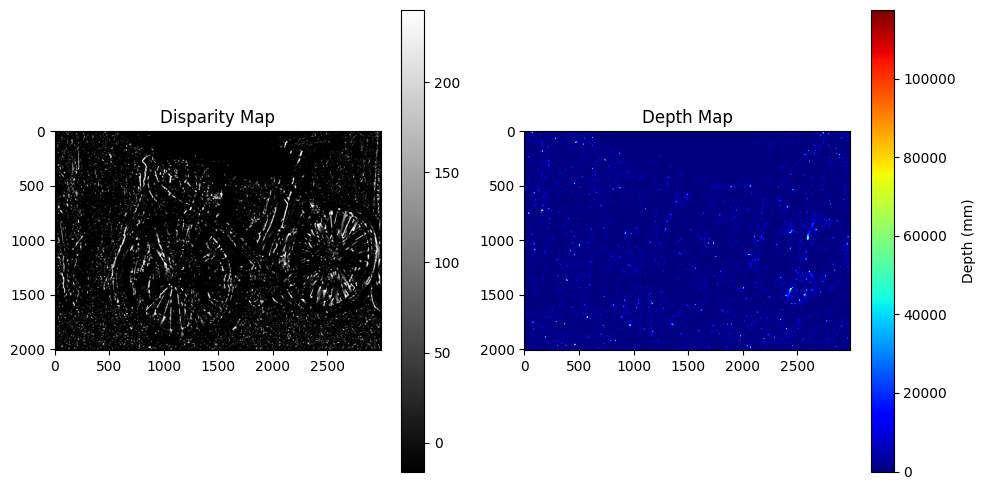

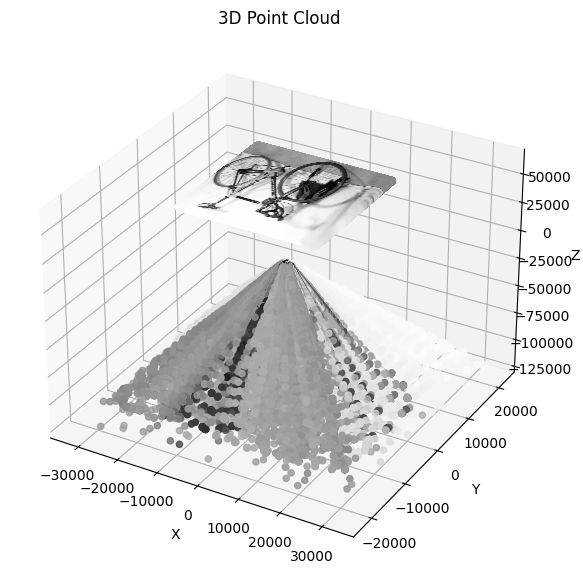

In [ ]:
points_3d = cv2.reprojectImageTo3D(disparity, Q)

# Display the disparity map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(disparity, cmap='gray')
plt.title('Disparity Map')
plt.colorbar()

# Display the depth map
plt.subplot(1, 2, 2)
plt.imshow(depth, cmap='jet')
plt.title('Depth Map')
plt.colorbar(label='Depth (mm)')

plt.tight_layout()
plt.show()

# Display 3D point cloud
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d[:, :, 0], points_3d[:, :, 1], points_3d[:, :, 2], c=img_left.reshape(-1), cmap='gray')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud')
plt.show()


Fundamental matrix:
[[ 3.34638533e-07  7.58547151e-06 -2.04147752e-03]
 [-5.83765868e-06  1.36498636e-06  2.67566877e-04]
 [ 1.45892349e-03 -4.37648316e-03  1.00000000e+00]]


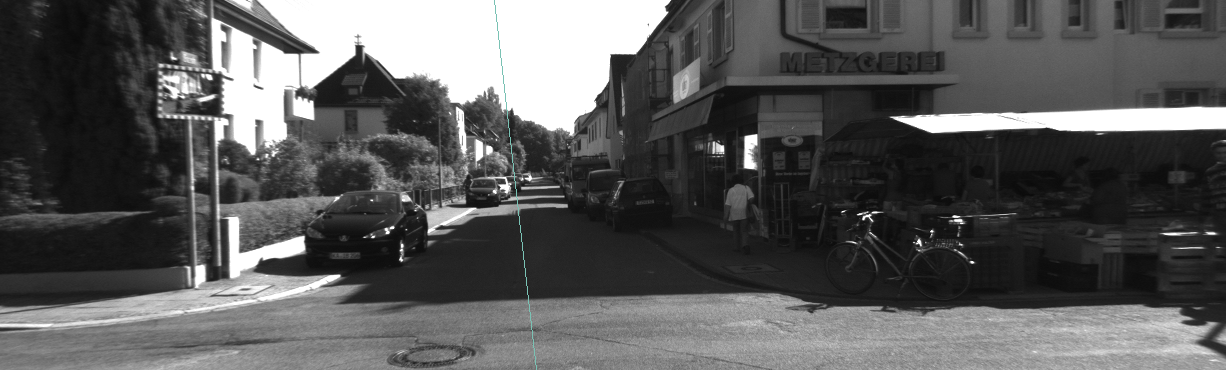

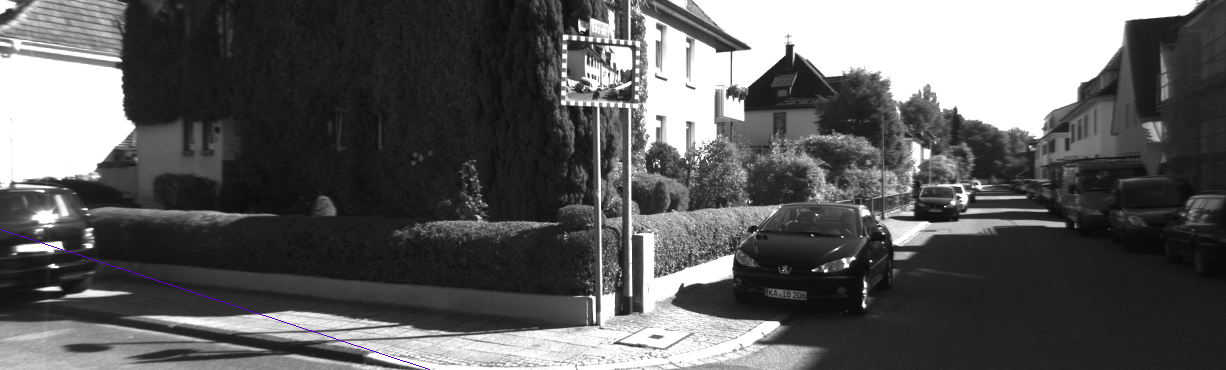

In [ ]:
import re
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# String representation of the Fundamental matrix
with open('/content/drive/MyDrive/Question2and3Images/FM.txt', 'r') as f:
    F_str = f.read()

# Extract float values using regular expressions
float_values = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][-+]?\d+)?', F_str)

# Convert string values to float
float_values = [float(val) for val in float_values]

# Ensure that we have exactly 9 values for a 3x3 matrix
assert len(float_values) == 9, "Incorrect number of values for a 3x3 matrix"

# Reshape the values into a 3x3 matrix
F = np.array(float_values).reshape(3, 3)

# Now you can use the 'F' variable in your code
# For example:
print("Fundamental matrix:")
print(F)


# Read the images
img1 = cv2.imread('/content/drive/MyDrive/Question2and3Images/000000.png')
img2 = cv2.imread('/content/drive/MyDrive/Question2and3Images/000023.png')


assert F.shape == (3, 3), "Fundamental matrix should be of shape (3, 3)"


lines1 = cv2.computeCorrespondEpilines(np.array([[10, 10]], dtype=np.float32), 1, F)
lines1 = lines1.reshape(-1, 3)
lines2 = cv2.computeCorrespondEpilines(np.array([[10, 10]], dtype=np.float32), 2, F)
lines2 = lines2.reshape(-1, 3)


img1_with_lines = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_with_lines = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
for r, pt1, pt2 in zip(lines1, [(0, 0), (img1.shape[1], 0)], [(0, img1.shape[0]), (img1.shape[1], img1.shape[0])]):
    color = tuple(np.random.randint(0, 255, 3).tolist())
    x0, y0 = map(int, [0, -r[2] / r[1]])
    x1, y1 = map(int, [img1.shape[1], -(r[2] + r[0] * img1.shape[1]) / r[1]])
    img1_with_lines = cv2.line(img1_with_lines, (x0, y0), (x1, y1), color, 1)
for r, pt1, pt2 in zip(lines2, [(0, 0), (img2.shape[1], 0)], [(0, img2.shape[0]), (img2.shape[1], img2.shape[0])]):
    color = tuple(np.random.randint(0, 255, 3).tolist())
    x0, y0 = map(int, [0, -r[2] / r[1]])
    x1, y1 = map(int, [img2.shape[1], -(r[2] + r[0] * img2.shape[1]) / r[1]])
    img2_with_lines = cv2.line(img2_with_lines, (x0, y0), (x1, y1), color, 1)

# Display images with epipolar lines
cv2_imshow(img1_with_lines)
cv2_imshow(img2_with_lines)
